In [1]:
import pymongo
from tqdm import *
import matplotlib.pyplot as plt
import DXYspider_Func as df
import numpy as np
import random
import seaborn as sb

In [2]:
client = pymongo.MongoClient('localhost', 27017)
db = client.DXY
collection1 = db.Heart_postId
collection2 = db.Heart_postInfo
collection3 = db.Heart_replyInfo
collection4 = db.proxies
collection5 = db.Heart_userInfo

In [3]:
Last_2006 = 7930620                                                 #每年最后一帖postId
Last_2007 = 10830842
Last_2008 = 13610445
Last_2009 = 16302572
Last_2010 = 19131681
Last_2011 = 21939274
Last_2012 = 24562698
Last_2013 = 27201704
Last_2014 = 29843456
Last_2015 = 32617034
Last_2016 = 35737264
Last_2017 = 38104267
Last_2018 = 40232426
Last_2019 = 42540911
Last_2020 = 44482921
Last_2021 = 45892642
Last_2022 = 46995503
lastList = [Last_2006,Last_2007,Last_2008,Last_2009,Last_2010,
            Last_2011,Last_2012,Last_2013,Last_2014,Last_2015,
            Last_2016,Last_2017,Last_2018,Last_2019,Last_2020,
            Last_2021,Last_2022]

In [4]:
def get_year(postId):
    temp = [Last_2006,Last_2007,Last_2008,Last_2009,Last_2010,Last_2011,Last_2012,Last_2013,Last_2014,Last_2015,Last_2016,Last_2017,Last_2018,Last_2019,Last_2020,Last_2021,Last_2022]
    temp.append(postId)
    temp.sort()
    return temp.index(postId)+2006


In [11]:
postIds = df.txt2list('postIds.txt')  
#postIds = [7467475,7468382,46995503]
sum = 0
interactionCount=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in tqdm(range(len(postIds))):
    data = collection3.find_one({'postId':postIds[0]})
    interactionCount[get_year(postIds[0])-2006] +=data.get('replies')
    del postIds[0]
    if i%100 ==0:#进度更新
        f=open('postIds.txt',mode='w')                             
        for postId in postIds:
            f.write(str(postId)+'\n')
        f.close()    


interactionCount

100%|██████████| 33132/33132 [06:19<00:00, 87.21it/s] 


[4233,
 33262,
 36920,
 31503,
 40039,
 34791,
 38102,
 41313,
 22672,
 22681,
 42736,
 32782,
 29073,
 41520,
 16538,
 34720,
 30963]

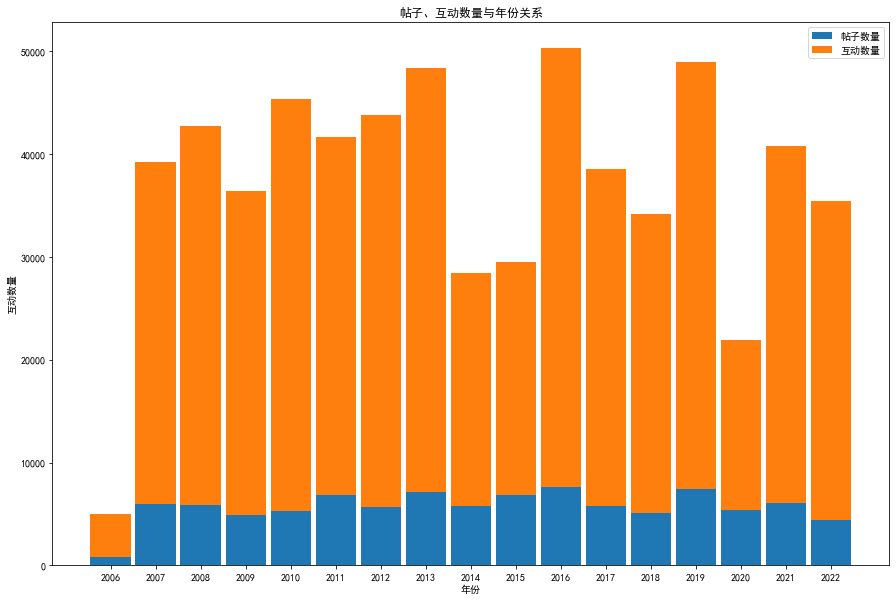

In [32]:
x_data = [i for i in range(2006,2023)]                              #帖子、互动
y_data = interactionCount
fig = plt.figure(figsize = (15,10),facecolor='white')

plt.bar(x_data,postCount,width=0.9,label = '帖子数量')
plt.bar(x_data,y_data,bottom = postCount,width=0.9,label = '互动数量')
plt.xticks(x_data)
plt.title("帖子、互动数量与年份关系")
plt.xlabel("年份")
plt.ylabel("互动数量")
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False
plt.legend()


100%|██████████| 2000/2000 [00:35<00:00, 56.67it/s]


Text(0, 0.5, '最后一次互动')

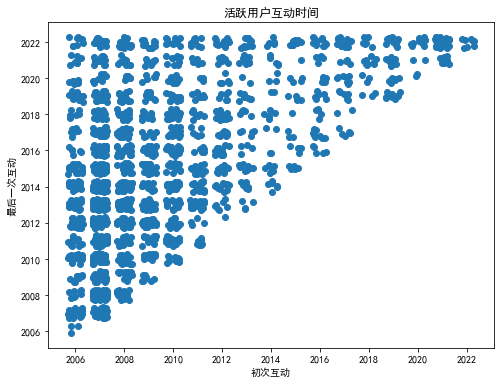

In [40]:
Ausers = df.txt2list('Ausers.txt')  
firstY = []
lastY = []
for i in tqdm(range(2000)):
    Id = Ausers[random.randint(0,len(Ausers)-1)]
    user = collection5.find_one({'userId':Id})
    firstY.append(get_year(user.get('firstI'))+random.uniform(-0.3, 0.3))
    lastY.append(get_year(user.get('lastI'))+random.uniform(-0.3, 0.3))
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False
fig = plt.figure(figsize=(8,6),facecolor='white')
plt.scatter(firstY, lastY)
plt.title('活跃用户互动时间')
plt.xticks([2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.yticks([2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.xlabel('初次互动')
plt.ylabel('最后一次互动')


2006 count:779
2007 count:5989
2008 count:5850
2009 count:4911
2010 count:5329
2011 count:6863
2012 count:5687
2013 count:7102
2014 count:5810
2015 count:6864
2016 count:7619
2017 count:5791
2018 count:5139
2019 count:7428
2020 count:5431
2021 count:6086
2022 count:4455


Text(0, 0.5, '帖子数量')

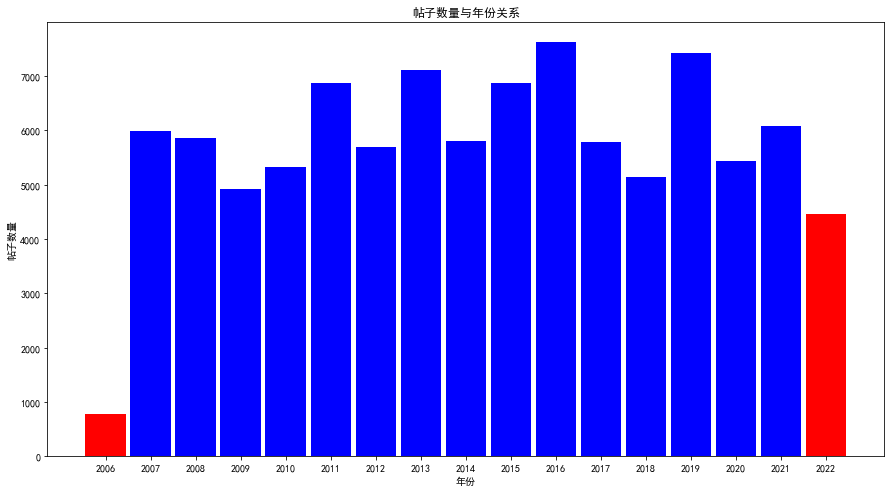

In [18]:
postCount =[]                                                                       #postCount
for i in range(17):
    if i ==0:
        count = collection2.count_documents({'postId':{'$lt':lastList[i]}})
    else:
        count = collection2.count_documents({'postId':{'$lt':lastList[i],'$gt':lastList[i-1]}})
    postCount.append(count)
    print(f'{i+2006} count:{count}')
x_data = [i for i in range(2006,2023)]                              #postCount
y_data = postCount
fig = plt.figure(figsize = (15,8),facecolor='white')
for i in range(len(x_data)):
    if i==0 or i ==16:
        plt.bar(x_data[i],y_data[i],width=0.9,color = 'red')
    else:
        plt.bar(x_data[i],y_data[i],width=0.9,color='blue')

plt.xticks(x_data)
plt.title("帖子数量与年份关系")
plt.xlabel("年份")
plt.ylabel("帖子数量")

([<matplotlib.axis.XTick at 0x227b755f8b0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '440'),
  Text(11, 0, '484'),
  Text(12, 0, '528'),
  Text(13, 0, '572'),
  Text(14, 0, '616'),
  Text(15, 0, '660'),
  Text(16, 0, '704'),
  Text(17, 0, '748'),
  Text(18, 0, '792'),
  Text(19, 0, '836'),
  Text(20, 0, '880'),
  Text(21, 0, '924'),
  Text(22, 0, '968'),
  Text(23, 0, '1012'),
  Text(24, 0, '1056'),
  Text(25, 0, '1100'),
  Text(26, 0, '1144'),
  Text(27, 0, '1188'),
  Text(28, 0, '1232'),
  Text(29, 0, '1276'),
  Text(30, 0, '1320'),
  Text(31, 0, '1364'),
  Text(32, 0, '1408'),
  Text(33, 0, '1452'),
  Text(34, 0, '1496'),
  Text(35, 0, '1540'),
  Text(36, 0, '1584'),
  Text(37, 0, '1628'),
  Text(38, 0, '1672'),
  Text(39, 0, '1716'),
  Text(40, 0, '1760'),
  Text(41, 0, '1804'),
  Text(42, 0, '1848'),
  Text(43, 0, '1892'

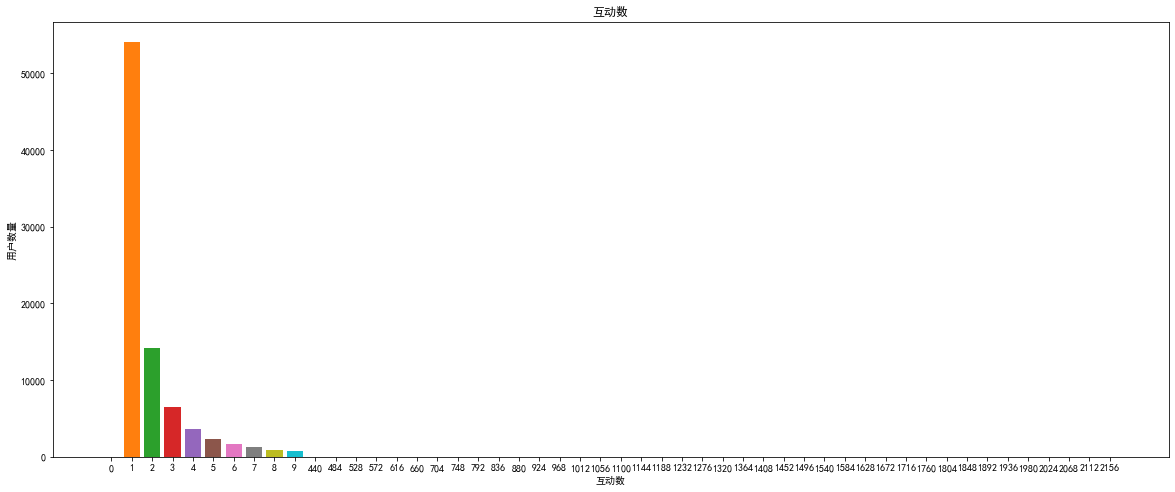

In [38]:
interactionCount =[]
for i in range(50):
    #interactionCount.append(collection5.count_documents({'interaction':{'$lt':i*20,'$gte':(i-1)*20}}))
    #'''
    if i < 10:
        interactionCount.append(collection5.count_documents({'interaction':i}))
    else:
        interactionCount.append(collection5.count_documents({'interaction':{'$lt':i*44,'$gte':(i-1)*44}}))
    #'''
len(interactionCount)
interactionTick =[]
for i in range(50):
    if i < 10:
        interactionTick.append(i)
    else:
        interactionTick.append(i*44)

len(interactionTick)
x_data = [i for i in range(len(interactionCount))]                              #用户互动数
y_data = interactionCount
fig = plt.figure(figsize = (20,8),facecolor='white')
for i in range(len(x_data)):
        plt.bar(x_data[i],y_data[i])


plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False 
plt.title("互动数")
plt.xlabel("互动数")
plt.ylabel("用户数量")
plt.xticks(ticks =np.arange(50),labels=interactionTick)
#plt.yscale('log')